In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
df = pd.read_csv('../development/K562_mean_attributions.csv')
fig = go.Figure()
# fig.add_trace(go.Scatter(df))
# fig.add_trace(go.Scatter(x=list(df.index[df['chrom'] == 'chr1']*2000),
marks = ['H2A.Z', 'H3K27ac', 'H3K79me2', 'H3K27me3',
                                 'H3K9ac', 'H3K4me2', 'H3K4me3', 'H3K9me3',
                                 'H3K4me1', 'H3K36me3', 'H4K20me1']
attributions = ['Attribution_H2A.Z', 'Attributions_H3K27ac', 'Attributions_H3K79me2', 'Attributions_H3K27me3',
                                 'Attributions_H3K9ac', 'Attributions_H3K4me2', 'Attributions_H3K4me3', 'Attributions_H3K9me3',
                                 'Attributions_H3K4me1', 'Attributions_H3K36me3', 'Attributions_H4K20me1']
fig = px.line(df, x=df.index*2000, y=df.columns[1:], 
              color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(
    title="Attributions from integrated gradient",
    xaxis_title="Genomic position (bp)",
    yaxis_title="attributions and podls",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
# fig.show()
fig.write_html("../development/attributions_mean_baseline_profile.html")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

df = pd.read_csv('../development/K562_attributions.csv')
X = df[df.columns[1:]].to_numpy()
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import torch
import torch.nn as nn
import torch.nn.functional as F

device = torch.device(
        "cuda") if torch.cuda.is_available() else torch.device("cpu")
class MLP(nn.Module):
    # def __init__(self):
    def __init__(self, units=100):
        super().__init__()
        self.lin1 = nn.Linear(11, units)
        self.lin2 = nn.Linear(units, 1)

    def forward(self, xb):
        xb = F.relu(self.lin1(xb))
        xb = F.relu(self.lin2(xb))
        return xb
model = MLP()
model = nn.DataParallel(model)
model.load_state_dict(torch.load('../development/model_weights.pth'))
model.to(device)
model.eval()
X_test = torch.Tensor([1, 0.75, 0.8, 0.9, 1, 0.75, 1, 1.5, 0.75, 1, 1])
predicted = model(X_test).detach().cpu().numpy()
print(predicted)

In [ ]:
#correlations for attributions
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_csv('../development/K562_zero_output_attributions.csv')
# for i in df[df.columns[1:14]]:
#     # df.loc[df[i] == 0, i] = np.min(df[i][(df[i] != 0)])
#     df[i] = df[i] + np.min(df[i][(df[i] != 0)])
#     df[i] = np.log10(df[i])
corrMatrix = df[df.columns[1:14]].corr(method='spearman')
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.clustermap(corrMatrix, annot=True, row_cluster=True,
                        col_cluster=True, metric='correlation',
                        cmap=sns.diverging_palette(220, 20, n=50))  # cbar_pos=(0, .2, .03, .4)
plt.title("Spearman correlation coefficients for attributions of K562 epigenetic markers", x=10, y=1)
plt.savefig('../development/correlation_of_attributions.png',
            dpi=300, bbox_inches='tight', transparent=False)

        Attributions_H4K20me1  Attributions_H3K4me3  Attributions_H3K4me2  \
0               -33432.222401          -14055.91868          -5479.095067   
1               -33432.222401          -14055.91868          -5479.095067   
2               -33432.222401          -14055.91868          -5479.095067   
3               -33432.222401          -14055.91868          -5479.095067   
4               -33432.222401          -14055.91868          -5479.095067   
...                       ...                   ...                   ...   
112598          -33432.222401          -14055.91868          -5479.095067   
112599          -33432.222401          -14055.91868          -5479.095067   
112600          -33432.222401          -14055.91868          -5479.095067   
112601          -33432.222401          -14055.91868          -5479.095067   
112602          -33432.222401          -14055.91868          -5479.095067   

        Attributions_H3K27me3  Attributions_H3K36me3  Attributions_H3K79me2

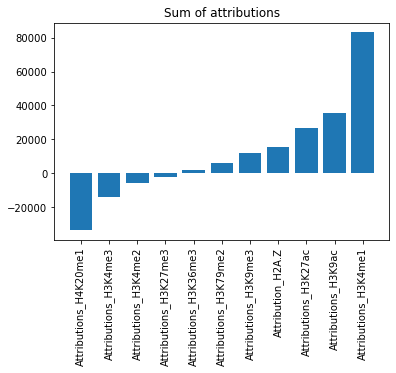

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../development/K562_zero_output_attributions.csv')
df = df[df.columns[1:12]]
df[df.columns] = np.sum(df)
print(df.sort_values(by=1, axis=1))
df = df.sort_values(by=1, axis=1)
plt.bar(df.columns, df.iloc[1, :])
plt.xticks(rotation=90)
plt.title('Sum of attributions')
plt.savefig('../development/sum_of_attributions.png',
            dpi=300, bbox_inches='tight', transparent=False)
